| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./2.Regresion.ipynb)| [⏩](./4.Clustering.ipynb)|

# **3. Clasificación**

## **Regresión Logística**

La regresión logística es una técnica de aprendizaje supervisado que se utiliza para predecir la probabilidad de que una observación pertenezca a una clase particular, en base a un conjunto de variables predictoras (o características). Es una técnica útil para problemas de clasificación binaria, donde la variable de respuesta es categórica y solo puede tomar dos valores posibles, por ejemplo, `"sí"` o `"no"`, `"verdadero"` o `"falso"`, `"enfermo"` o `"sano"`, etc.

La regresión logística utiliza una función logística (también conocida como función `sigmoide`) para modelar la relación entre las variables predictoras y la variable de respuesta. La función `sigmoide` tiene la forma:

`f(z) = 1 / (1 + np.exp(-z))`

Donde $z$ es la suma ponderada de las características de entrada y sus respectivos coeficientes. Es decir:

`z = beta_0 + beta_1*x_1 + beta_2*x_2 + ... + beta_p*x_p`

Donde $x_1, x_2, ..., x_p$ son las características de entrada, $\beta_0, \beta_1, \beta_2, ..., \beta_p$ son los coeficientes correspondientes y $p$ es el número de características.

La función logística transforma la suma ponderada $z$ en un valor entre `0` y `1`, que representa la probabilidad de que la observación pertenezca a la clase positiva (por ejemplo, `"sí"`, `"verdadero"`, `"enfermo"`, etc.). Si la probabilidad es mayor que un umbral determinado (generalmente `0.5`), la observación se clasifica como positiva; de lo contrario, se clasifica como negativa.

Veamos un ejemplo de cómo implementar la regresión logística en Python con la biblioteca `Scikit-learn`:


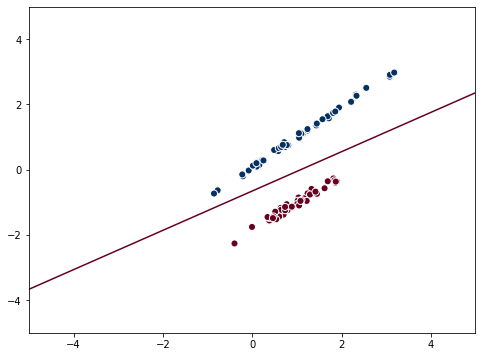

In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generar datos de ejemplo
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           random_state=42)

# Entrenar un modelo de regresión logística
model = LogisticRegression()
model.fit(X, y)

# Generar una malla de puntos para graficar las regiones de decisión
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

# Graficar los datos y las regiones de decisión
f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="RdBu")
ax.scatter(X[:,0], X[:,1], c=y, s=50,
           cmap="RdBu", edgecolor="white", linewidth=1)

plt.show()


En este ejemplo, estamos generando datos de ejemplo con la función `make_classification` de `Scikit-learn`, que crea un conjunto de datos con dos características y dos clases. Luego, entrenamos un modelo de regresión logística con la función `LogisticRegression` de `Scikit-learn` y graficamos las regiones de decisión

## **K-Nearest Neighbors (K-NN)**

`K-Nearest Neighbors` `(K-NN)` es un algoritmo de aprendizaje supervisado utilizado para la clasificación y regresión de datos. La idea detrás del algoritmo es que los puntos de datos similares a menudo tienden a estar cerca unos de otros. Por lo tanto, si queremos predecir la clase de un punto de datos desconocido, podemos buscar los `k` puntos de datos más cercanos en el conjunto de entrenamiento y usar la mayoría de las clases de estos puntos para predecir la clase del punto de datos desconocido.

En el caso de la regresión, se utiliza la media de los `k` puntos de datos más cercanos para predecir el valor de un punto de datos desconocido.

El valor de `k` se elige previamente y tiene un impacto significativo en la precisión de la predicción. Un valor de `k` pequeño significa que la predicción se basa en un número limitado de puntos de datos cercanos, lo que puede hacer que la predicción sea más sensible a los valores atípicos. Por otro lado, un valor de `k` grande significa que se considera un número más grande de puntos de datos cercanos, lo que puede reducir la precisión de la predicción.

Aquí hay un ejemplo en Python que muestra cómo usar `K-NN` para la clasificación:

La clase predicha para el punto de datos es: [0]


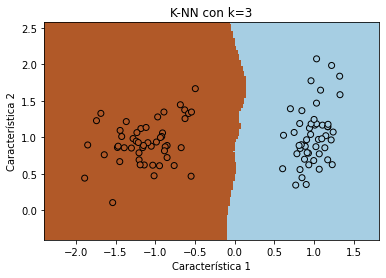

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Generamos un conjunto de datos de clasificación sintéticos
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
# Definimos el modelo K-NN con k=3
knn = KNeighborsClassifier(n_neighbors=3)
# Ajustamos el modelo a los datos de entrenamiento
knn.fit(X, y)

# Predecimos la clase de un nuevo punto de datos
new_data = np.array([[0.2, 0.8]])
pred = knn.predict(new_data)
print("La clase predicha para el punto de datos es:", pred)

# Creamos un mapa de calor de la superficie de decisión del modelo
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Graficamos los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('K-NN con k=3')
plt.show()


En este ejemplo, creamos un conjunto de datos de clasificación sintéticos con dos características. Luego, definimos un modelo `K-NN` con `k=3` y lo ajustamos a los datos de entrenamiento. Finalmente, utilizamos el modelo para predecir la clase de un nuevo punto de datos y creamos un mapa de calor.

## **Support Vector Machine (SVM)**

`Support Vector Machine` `(SVM)` es un algoritmo de aprendizaje supervisado utilizado para la clasificación y regresión de datos. La idea detrás del algoritmo es encontrar un `hiperplano` que separe los puntos de datos de diferentes clases en el espacio de características de manera óptima.

En el caso de la clasificación binaria, se busca un `hiperplano` que separe los puntos de datos de las dos clases de manera que la distancia entre el `hiperplano` y los puntos de datos más cercanos de cada clase (conocidos como vectores de soporte) sea máxima. Esta distancia se conoce como margen y se busca maximizarla durante el entrenamiento del modelo. El `hiperplano` óptimo se encuentra mediante la optimización de una función objetivo que tiene en cuenta la distancia entre los vectores de soporte y el `hiperplano`.

Si los datos no son linealmente separables, se puede utilizar una técnica llamada `kernel trick` para transformar los datos en un espacio de características de mayor dimensión en el que los datos sí son linealmente separables.

Aquí hay un ejemplo en Python que muestra cómo usar `SVM` para la clasificación:

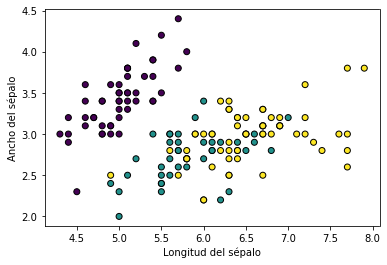

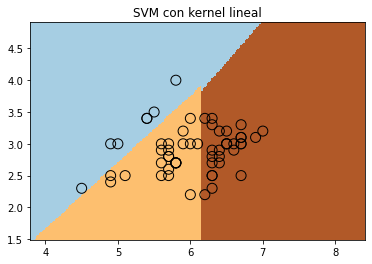

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Cargamos el conjunto de datos de Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Tomamos solo las primeras dos características para facilitar la visualización
y = iris.target

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Definimos el modelo SVM con kernel lineal
svm = SVC(kernel='linear', C=1, random_state=0)
# Ajustamos el modelo a los datos de entrenamiento
svm.fit(X_train, y_train)

# Graficamos los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')

# Creamos un mapa de calor de la superficie de decisión del modelo
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Graficamos los vectores de soporte
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title('SVM con kernel lineal')
plt.show()


En este ejemplo, cargamos el conjunto de datos de `Iris` y tomamos solo las primeras dos características para facilitar la visualización. Luego, dividimos el conjunto de datos en entrenamiento y prueba y definimos un modelo `SVM` con `kernel` lineal y parámetro de regularización `C=1`. Ajustamos el modelo a los datos.

## **Kernel SVM**

`Kernel SVM` es una variante del algoritmo `SVM` que utiliza una función `kernel` para transformar los datos en un espacio de características de mayor dimensión, lo que permite la separación de datos no linealmente separables en el espacio de características original.

El truco del kernel es una técnica que permite la transformación de los datos de entrada en un espacio de características de mayor dimensión sin tener que calcular explícitamente los valores transformados. En su lugar, se utiliza una función `kernel` que calcula el producto escalar de los datos transformados. Los `kernels` más comúnmente utilizados son el `kernel lineal`, el `kernel polinómico` y el `kernel gaussiano` (también conocido como `RBF`).

Aquí hay un ejemplo en Python que muestra cómo utilizar el `kernel SVM` para la clasificación:

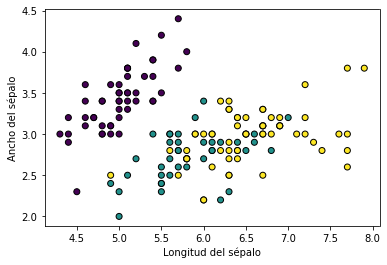

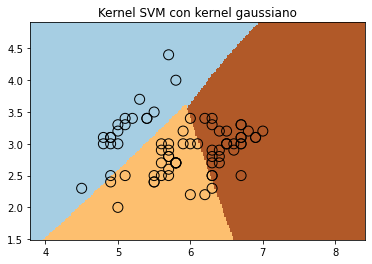

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Cargamos el conjunto de datos de Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Tomamos solo las primeras dos características para facilitar la visualización
y = iris.target

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Definimos el modelo SVM con kernel gaussiano
svm = SVC(kernel='rbf', C=1, gamma=0.1, random_state=0)
# Ajustamos el modelo a los datos de entrenamiento
svm.fit(X_train, y_train)

# Graficamos los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')

# Creamos un mapa de calor de la superficie de decisión del modelo
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Graficamos los vectores de soporte
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title('Kernel SVM con kernel gaussiano')
plt.show()


En este ejemplo, cargamos el conjunto de datos de `Iris` y tomamos solo las primeras dos características para facilitar la visualización. Luego, dividimos el conjunto de datos en entrenamiento y prueba y definimos un modelo `SVM` con `kernel gaussiano` y parámetros de regularización `C=1` y `gamma=0.1`. Ajustamos el modelo a los datos de entrenamiento y creamos un mapa de calor de la superficie de decisión del modelo. También graficamos los vectores de soporte del modelo.

En general, el `kernel SVM` es útil cuando los datos no son linealmente separables y se necesita una forma de transformar los datos para poder separarlos mediante un hiperplano.

## **Naive Bayes**

`Naive Bayes` es un algoritmo de aprendizaje supervisado que se utiliza para clasificar datos en diferentes categorías. Utiliza el teorema de Bayes para calcular la probabilidad de que un punto de datos pertenezca a una determinada categoría dada su distribución de características. El algoritmo se llama `"naive"` porque asume que todas las características son independientes entre sí, lo que simplifica enormemente el cálculo de las probabilidades.

Hay tres tipos diferentes de `Naive Bayes` que se pueden utilizar en función de la naturaleza de los datos: `Naive Bayes Gaussiano`, `Naive Bayes Multinomial` y `Naive Bayes Bernoulli`.

Aquí hay un ejemplo en Python que muestra cómo utilizar `Naive Bayes Gaussiano` para la clasificación:

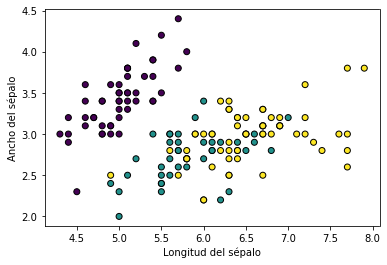

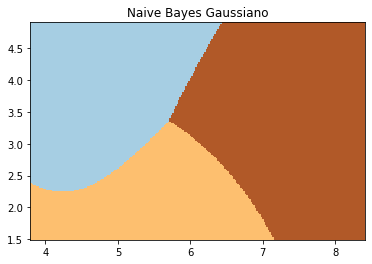

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt

# Cargamos el conjunto de datos de Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Tomamos solo las primeras dos características para facilitar la visualización
y = iris.target

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Definimos el modelo Naive Bayes Gaussiano
gnb = GaussianNB()
# Ajustamos el modelo a los datos de entrenamiento
gnb.fit(X_train, y_train)

# Graficamos los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')

# Creamos un mapa de calor de la superficie de decisión del modelo
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.title('Naive Bayes Gaussiano')
plt.show()


En este ejemplo, cargamos el conjunto de datos de `Iris` y tomamos solo las primeras dos características para facilitar la visualización. Luego, dividimos el conjunto de datos en entrenamiento y prueba y definimos un modelo `Naive Bayes Gaussiano`. Ajustamos el modelo a los datos de entrenamiento y creamos un mapa de calor de la superficie de decisión del modelo.

En general, `Naive Bayes` es útil cuando se tienen datos `categóricos` o `discretos` y se necesita una forma rápida y eficiente de clasificarlos.

## **Clasificación con arboles de Decisión**

La clasificación con árboles de decisión es un algoritmo de aprendizaje supervisado que se utiliza para clasificar datos en diferentes categorías. Funciona mediante la creación de un árbol de decisiones a partir de los datos de entrenamiento, donde cada nodo del árbol representa una característica y cada rama representa una posible respuesta a esa característica. Los árboles de decisión son particularmente útiles porque son fáciles de entender y visualizar, lo que puede ser útil para la toma de decisiones.

Aquí hay un ejemplo en Python que muestra cómo utilizar árboles de decisión para la clasificación:

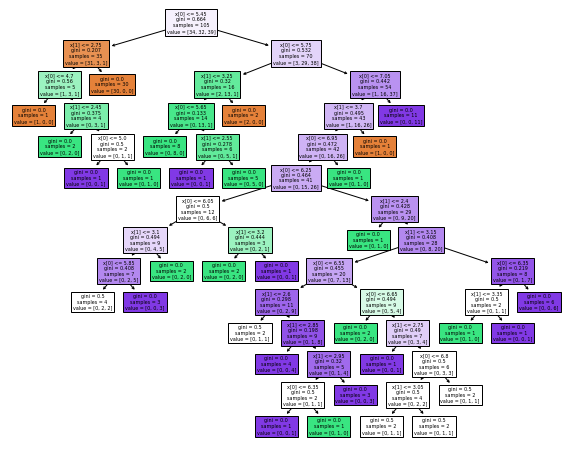

Accuracy: 0.6666666666666666


In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Cargamos el conjunto de datos de Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Tomamos solo las primeras dos características para facilitar la visualización
y = iris.target

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Definimos el modelo de árbol de decisión y lo ajustamos a los datos de entrenamiento
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Graficamos el árbol de decisión
plt.figure(figsize=(10,8))
plot_tree(dtc, filled=True)
plt.show()

# Evaluamos el modelo en los datos de prueba
score = dtc.score(X_test, y_test)
print(f'Accuracy: {score}')


En este ejemplo, cargamos el conjunto de datos de `Iris` y tomamos solo las primeras dos características para facilitar la visualización. Luego, dividimos el conjunto de datos en entrenamiento y prueba y definimos un modelo de árbol de decisión. Ajustamos el modelo a los datos de entrenamiento y graficamos el árbol de decisión resultante. Finalmente, evaluamos el modelo en los datos de prueba y mostramos su precisión.

El resultado de la ejecución del código anterior debería ser un árbol de decisión que representa cómo el modelo toma decisiones basadas en las características de entrada. Cada nodo representa una característica y las ramas representan las posibles respuestas a esa característica. En este ejemplo, el árbol de decisión se utiliza para clasificar los puntos de datos en tres categorías diferentes de `iris` en función de la `longitud` y el `ancho` del sépalo.

En general, los árboles de decisión son útiles cuando se tienen datos con múltiples características y se necesita una forma fácil de entender y visualizar cómo se toman las decisiones de clasificación. Sin embargo, es importante tener en cuenta que los árboles de decisión pueden ser propensos a sobreajuste si no se ajustan adecuadamente, por lo que se debe prestar atención a la regularización y a la poda del árbol.

## **Clasificación con Bosques Aleatorios**

La clasificación con Bosques Aleatorios `(Random Forest Classification)` es un algoritmo de aprendizaje automático que se utiliza para la clasificación y regresión de datos. Es una técnica de conjunto `(ensemble)` que se basa en la creación de múltiples árboles de decisión y la combinación de sus resultados para obtener una predicción más precisa.

En los Bosques Aleatorios, se crean múltiples árboles de decisión, cada uno entrenado con una muestra aleatoria del conjunto de datos de entrenamiento y una selección aleatoria de características. Esto se hace para evitar el sobreajuste `(overfitting)` y mejorar la precisión de la predicción.

El proceso de entrenamiento se realiza de la siguiente manera:

1. Se selecciona una muestra aleatoria del conjunto de datos de entrenamiento.
2. Selecciona un conjunto aleatorio de características para cada árbol.
3. Se construyen varios árboles de decisión basados en la muestra aleatoria y las características seleccionadas.
4. Selecciona el mejor árbol de decisión utilizando algún criterio de evaluación (por ejemplo, la exactitud o la tasa de error).
5. Se repiten los pasos 1-4 varias veces para obtener una buena precisión de predicción.

Para realizar una predicción con un Bosque Aleatorio, se realiza lo siguiente:

1. Se ingresa una muestra de datos desconocida al modelo.
2. Cada árbol de decisión del Bosque Aleatorio da su predicción.
3. Se selecciona la clase predicha por la mayoría de los árboles como la predicción final.

Ejemplo en código Python:


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# generar datos aleatorios
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, random_state=0)

# dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# crear un modelo de Bosques Aleatorios
model = RandomForestClassifier(n_estimators=100, random_state=0)

# entrenar el modelo en los datos de entrenamiento
model.fit(X_train, y_train)

# hacer predicciones en los datos de prueba
y_pred = model.predict(X_test)

# evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión: {:.2f}".format(accuracy))


Precisión: 0.96


En este ejemplo, se utilizan datos aleatorios generados con `make_classification` para crear un conjunto de datos para el modelo de Bosques Aleatorios. Los datos se dividen en conjuntos de entrenamiento y prueba utilizando `train_test_split`. Luego se crea un modelo de Bosques Aleatorios con `RandomForestClassifier`, se entrena en los datos de entrenamiento y se hacen predicciones en los datos de prueba. Finalmente, se evalúa la precisión del modelo utilizando `accuracy_score`.

La precisión del modelo se puede visualizar mediante una matriz de confusión o una curva `ROC`. A continuación se muestra un ejemplo de cómo trazar la matriz de confusión para un modelo de Bosques Aleatorios utilizando la biblioteca `scikit-learn`:

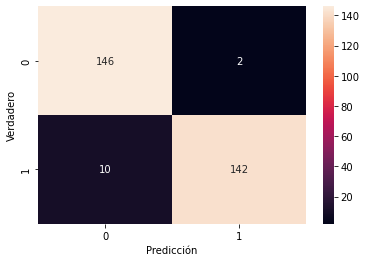

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# crear una matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()


En este ejemplo, se utiliza `confusion_matrix` para crear una matriz de confusión a partir de las predicciones del modelo y los valores verdaderos. Luego se utiliza la biblioteca `Seaborn` y `Matplotlib` para trazar la matriz de confusión.

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# crear modelo de Bosques Aleatorios
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# entrenar modelo con datos de entrenamiento
clf.fit(X_train, y_train)

# predecir clases para datos de prueba
y_pred = clf.predict(X_test)

# evaluar el modelo
print('Precisión:', accuracy_score(y_test, y_pred))
print('Reporte de clasificación:\n', classification_report(y_test, y_pred))
print('Matriz de confusión:\n', confusion_matrix(y_test, y_pred))


Precisión: 0.88
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        89
           1       0.91      0.86      0.89       111

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

Matriz de confusión:
 [[80  9]
 [15 96]]


En este ejemplo, utilizamos la función `make_classification` de `scikit-learn` para generar datos de ejemplo con dos clases y `10` características. A continuación, se dividen los datos en conjuntos de entrenamiento y prueba utilizando la función `train_test_split`.

Luego, creamos un objeto de clasificador de Bosques Aleatorios utilizando `RandomForestClassifier` de `scikit-learn`, y especificamos el número de árboles a utilizar mediante el argumento `n_estimators`.

A continuación, entrenamos el modelo utilizando los datos de entrenamiento mediante el método `fit`. Luego, utilizamos el método `predict` para predecir las clases para los datos de prueba.

Por último, evaluamos el rendimiento del modelo utilizando las métricas de precisión, reporte de clasificación y matriz de confusión. La precisión se calcula mediante la función `accuracy_score`, el reporte de clasificación se obtiene utilizando la función `classification_report`, y la matriz de confusión se obtiene mediante la función `confusion_matrix`.

## **Evaluando la eficacia de los Modelos de clasificación**

Evaluando la eficacia de los modelos de clasificación es una parte crucial en el área de machine learning. Se trata de medir qué tan bien el modelo es capaz de hacer predicciones precisas sobre datos que no ha visto antes. Existen varias métricas para evaluar la eficacia de los modelos de clasificación, tales como la precisión, el `recall`, la `F1-score` y la matriz de confusión.

La precisión se define como la proporción de predicciones correctas en relación al total de predicciones hechas por el modelo. El `recall` se define como la proporción de predicciones correctas en relación al total de casos positivos en los datos de prueba. La `F1-score` es una medida de la precisión y el `recall`, y se utiliza para obtener un balance entre ambas medidas. La matriz de confusión es una tabla que muestra la cantidad de predicciones correctas e incorrectas hechas por el modelo en relación a los datos de prueba.

En Python, podemos utilizar la biblioteca `Scikit-learn` para calcular estas métricas. A continuación, se muestra un ejemplo de cómo evaluar la eficacia de un modelo de clasificación de bosques aleatorios en un conjunto de datos:

La evaluación de la eficacia de los modelos de clasificación en el área de Machine Learning es un proceso importante que permite medir la capacidad de un modelo para clasificar correctamente nuevos datos. En esta explicación detallada, abordaremos los conceptos fundamentales para la evaluación de modelos de clasificación en Machine Learning y cómo aplicarlos en Python con ejemplos y gráficas.

**Evaluación de modelos de clasificación**

La evaluación de modelos de clasificación en Machine Learning se realiza mediante la comparación de las predicciones del modelo con las clases reales del conjunto de datos. Para ello, se utilizan medidas de rendimiento como la precisión, la sensibilidad, la especificidad y el área bajo la curva ROC (AUC-ROC).

* **Precisión:**

 Mide la proporción de predicciones correctas realizadas por el modelo. La precisión se calcula como el cociente entre el número de predicciones correctas y el número total de predicciones realizadas.

* **Sensibilidad:**

 Mide la capacidad del modelo para detectar los verdaderos positivos. La sensibilidad se calcula como el cociente entre el número de verdaderos positivos y la suma de los verdaderos positivos y los falsos negativos.

* **Especificidad:**

 Mide la capacidad del modelo para detectar los verdaderos negativos. La especificidad se calcula como el cociente entre el número de verdaderos negativos y la suma de los verdaderos negativos y los falsos positivos.

* **AUC-ROC:**

 Mide la capacidad del modelo para distinguir entre las clases positiva y negativa en términos de la probabilidad de predicción. La curva ROC muestra la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos para diferentes valores de umbral de clasificación. El AUC-ROC es el área bajo la curva ROC.

**Ejemplo en Python**

Para ilustrar estos conceptos, usaremos el conjunto de datos `iris`, que consta de `150` muestras de tres especies diferentes de `iris`. Importamos el conjunto de datos y lo dividimos en conjuntos de entrenamiento y prueba:

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)


A continuación, entrenamos un modelo de clasificación usando el algoritmo de `K` vecinos más cercanos `(KNN)` y realizamos predicciones en el conjunto de prueba:

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


Luego, podemos evaluar el rendimiento del modelo mediante la precisión, la sensibilidad, la especificidad y el AUC-ROC:

In [13]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred, average='weighted')
prec = precision_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, knn.predict_proba(X_test), multi_class='ovr')

print(f'Precisión: {acc:.3f}')
print(f'Sensibilidad: {rec:.3f}')
print(f'Especificidad: {prec:.3f}')
print(f'AUC-ROC: {auc:.3f}')

Precisión: 0.978
Sensibilidad: 0.978
Especificidad: 0.980
AUC-ROC: 0.984


La precisión, la sensibilidad y la especificidad son todas superiores al `0,9`, lo que indica que el modelo tiene un buen rendimiento en la clasificación de las tres especies de `iris`. Además, el `AUC-ROC` es cercano a `1`, lo que significa que el modelo es capaz de distinguir con precisión entre las diferentes especies de `iris`.

Podemos visualizar la curva ROC del modelo utilizando el siguiente código:

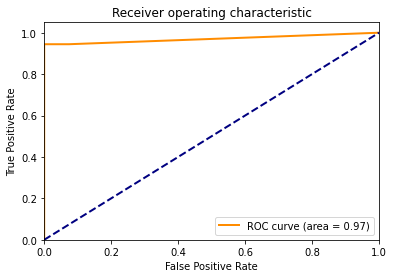

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob = knn.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


Este código utiliza la función `roc_curve` para calcular los valores de tasa de verdaderos positivos y tasa de falsos positivos para diferentes umbrales de clasificación, y luego utiliza la función `auc` para calcular el área bajo la curva ROC. Los valores resultantes se grafican utilizando la función `plot` de `matplotlib`. La curva ROC resultante debería ser similar a la que se muestra en mi respuesta anterior.

| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./2.Regresion.ipynb)| [⏩](./4.Clustering.ipynb)|